In [1]:
from IPython.display import Image, display
from langgraph.types import Command
from langgraph.checkpoint.memory import MemorySaver
from graph import builder

D:\python311\Lib\site-packages\langchain\chat_models\__init__.py:25: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from langchain.chat_models.base import init_chat_model


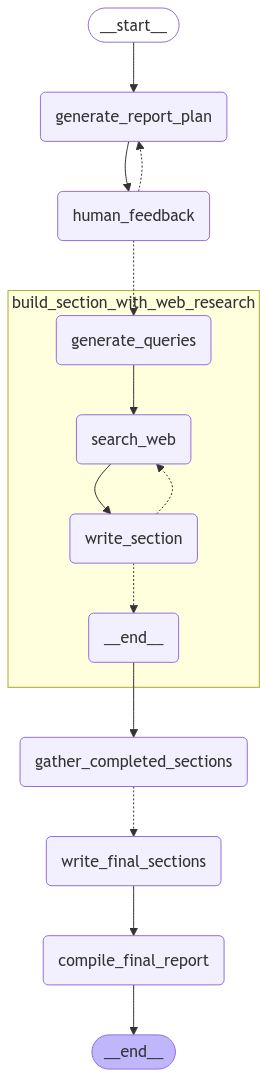

In [2]:
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [2]:
import uuid 
from IPython.display import Markdown

thread = {"configurable": {"thread_id": str(uuid.uuid4()),}}

In [3]:
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)
async for event in graph.astream({"topic":"openai deep reserach",}, thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

[SystemMessage(content='您正在为一份报告进行研究。\n\n<报告主题>\nopenai deep reserach\n</报告主题>\n\n<报告组织结构>\n使用此结构来创建关于用户提供主题的报告：\n\n1. 引言（无需研究）\n   - 主题领域的简要概述\n\n2. 正文部分：\n   - 每个部分应关注用户提供主题的一个子主题\n   \n3. 结论\n   - 力求使用1个结构元素（列表或表格）来提炼正文部分的内容\n   - 提供报告的简明总结\n</报告组织结构>\n\n<任务>\n您的目标是生成2个网络搜索查询，以帮助收集规划报告章节所需的信息。\n\n这些查询应当：\n\n1. 与报告主题相关\n2. 有助于满足报告组织结构中指定的要求\n\n请确保查询足够具体，以找到高质量、相关的资源，同时涵盖报告结构所需的广度。\n</任务>\n\n请严格按照以下JSON格式返回结果：\n{\n  "$defs": {\n    "SearchQuery": {\n      "properties": {\n        "search_query": {\n          "default": null,\n          "description": "要进行网络搜索的query",\n          "title": "Search Query",\n          "type": "string"\n        }\n      },\n      "title": "SearchQuery",\n      "type": "object"\n    }\n  },\n  "properties": {\n    "queries": {\n      "description": "搜索query列表",\n      "items": {\n        "$ref": "#/$defs/SearchQuery"\n      },\n      "title": "Queries",\n      "type": "array"\n    }\n  },\n  "required": [\n    "queries"\n  ],\n  "title": "Queries",\n  "type"

请对以下报告计划提供反馈。
                        

Section: 引言
Description: 简要概述OpenAI的Deep Research主题领域，介绍报告的目的和结构。
Research needed: No


Section: Deep Research的技术基础
Description: 探讨Deep Research的技术架构，包括其基于的OpenAI o3模型和强化学习机制。
Research needed: Yes


Section: Deep Research的功能与应用
Description: 详细介绍Deep Research的功能，如多步骤研究、实时信息处理，以及其在不同领域的应用实例。
Research needed: Yes


Section: Deep Research的安全性与伦理考量
Description: 分析Deep Research在发布前的安全工作，包括外部红队测试和风险缓解措施。
Research needed: Yes


Section: Deep Research的性能评估
Description: 基于相关数据和案例，评估Deep Research的性能，包括其准确性和效率。
Research needed: Yes


Section: Deep Research的未来发展
Description: 探讨Deep Research的未来发展方向和潜在影响，包括技术升级和更广泛的应用场景。
Research needed: Yes


Section: 结论
Description: 使用列表或表格提炼正文部分的内容，提供报告的简明总结。
Research needed: No



                        
报告计划是否满足您的需求？输入'true'来批准报告计划，或提供反馈以重新生成报告计划：

In [4]:
async for event in graph.astream(Command(resume=True), thread, stream_mode="updates"):
    print(event)
    print("\n")

{'human_feedback': None}


[SystemMessage(content='你是一位专业技术写作专家，负责制定有针对性的网络搜索查询，以收集全面的信息用于撰写技术报告章节。\n\n<报告主题>\nopenai deep reserach\n</报告主题>\n\n<章节主题>\nname=\'Deep Research的未来发展\' description=\'探讨Deep Research的未来发展方向和潜在影响，包括技术升级和更广泛的应用场景。\' research=True content=\'\'\n</章节主题>\n\n<任务>\n你的目标是生成3个搜索查询，帮助收集关于上述章节主题的全面信息。\n\n这些查询应当：\n\n1. 与主题相关\n2. 探索主题的不同方面\n3. 使用与章节主题相同语言\n\n请确保查询足够具体，以找到高质量、相关的信息源。\n</任务>\n\n请严格按照以下JSON格式返回结果：\n{\n  "$defs": {\n    "SearchQuery": {\n      "properties": {\n        "search_query": {\n          "default": null,\n          "description": "要进行网络搜索的query",\n          "title": "Search Query",\n          "type": "string"\n        }\n      },\n      "title": "SearchQuery",\n      "type": "object"\n    }\n  },\n  "properties": {\n    "queries": {\n      "description": "搜索query列表",\n      "items": {\n        "$ref": "#/$defs/SearchQuery"\n      },\n      "title": "Queries",\n      "type": "array"\n    }\n  },\n  "required": [\n    "queries"\n  ],\n  "title": "Queri

In [5]:
from IPython.display import Markdown

In [6]:
final_state = graph.get_state(thread)
report = final_state.values.get('final_report')
Markdown(report)

# 引言

OpenAI的Deep Research是一个前沿的研究工具，它基于OpenAI的O3模型，通过强化学习机制在广泛的领域内进行深度推理和浏览任务训练。本报告旨在概述Deep Research的主题领域，并介绍其技术基础、功能与应用、安全性与伦理考量、性能评估以及未来发展方向。

本报告首先探讨了Deep Research的技术基础，包括其基于的O3模型和强化学习机制，并展示了其在科学研究、法律分析和创意领域的应用案例。接着，报告详细介绍了Deep Research的功能，如多步骤研究、实时信息处理，以及其在不同领域的应用实例。此外，报告还分析了Deep Research在发布前的安全工作，包括外部红队测试和风险缓解措施，并对其性能进行了评估。

最后，报告展望了Deep Research的未来发展方向，包括技术升级和更广泛的应用场景，如Transformer模型的扩展、自监督学习的兴起以及联邦学习的应用。通过本报告，读者可以全面了解Deep Research的各个方面，并对其未来在人工智能领域的发展充满期待。

## Deep Research的技术基础

**粗体**Deep Research的技术基础建立在OpenAI的O3模型之上，该模型通过强化学习在广泛的领域内进行深度推理和浏览任务训练。O3模型能够处理大量信息，整合文本、PDF和图像，从而进行连贯的分析。

### 技术架构

- **O3模型**：优化于网络浏览和数据分析，为Deep Research提供强大的推理能力。
- **强化学习**：通过实时信息反馈和回溯，使Deep Research能够执行多步骤轨迹以找到所需数据。
- **扩展思考时间**：允许Deep Research进行更深入、更细致的问题探索。

### 应用案例

例如，Deep Research可以自动搜索和阅读来自不同在线来源的信息，创建关于复杂主题的详尽、有文档记录且明确引用的报告。

### 总结

Deep Research的技术基础为AI在科学研究、法律分析和创意领域等领域带来了突破性的进步。通过O3模型和强化学习，Deep Research能够执行复杂的推理任务，从而推动创新和发现。

### 参考资料

- Source Introducing deep research - OpenAI: https://openai.com/index/introducing-deep-research/
- Source OpenAI's Deep Research Feature: Leveraging O3 and Extended Thinking for ...: https://algocademy.com/blog/openais-deep-research-feature-leveraging-o3-and-extended-thinking-for-advanced-ai/
- Source Deep Research FAQ | OpenAI Help Center: https://help.openai.com/en/articles/10500283-deep-research-faq
- Source Understanding OpenAI's O3 Models: A Deep Dive into Innovation: https://technicalinterest.com/understanding-openais-o3-models-a-deep-dive-into-innovation/
- Source PDF: https://cdn.openai.com/deep-research-system-card.pdf

## Deep Research的功能与应用

**粗体**Deep Research**通过其强大的AI能力，能够自动执行多步骤研究，极大地提高了研究效率和准确性。它利用OpenAI的o3模型，能够从互联网上独立搜索和阅读信息，生成详尽、有文档支持且明确引用的报告。

### 功能概述
- **多步骤研究**：Deep Research能够自动执行复杂的研究流程，包括信息搜集、分析和综合。
- **实时信息处理**：它能够实时处理和整合来自不同在线来源的信息。
- **自动化报告生成**：生成详细、结构化的报告，节省研究人员大量时间。

### 应用实例
- **金融分析**：Deep Research可以用于分析市场趋势，提供投资建议。
- **科学研究**：在医学和生物学领域，它可以用于文献综述和数据分析。
- **法律领域**：律师可以使用它来分析案例和法规，提高工作效率。

### 案例研究
例如，在金融领域，Deep Research可以快速分析数百页的财务报告和市场数据，生成详细的报告，帮助分析师做出更准确的决策。

### 参考资料
- Source Introducing deep research - OpenAI: https://openai.com/index/introducing-deep-research/
- Source Deep Research FAQ | OpenAI Help Center: https://help.openai.com/en/articles/10500283-deep-research-faq
- Source OpenAI's Deep Research can save you hours of work - ZDNET: https://www.zdnet.com/article/openais-deep-research-can-save-you-hours-of-work-and-now-its-a-lot-cheaper-to-access/

## Deep Research的安全性与伦理考量

**粗体见解：OpenAI的Deep Research在发布前经过严格的安全测试和风险缓解措施，以确保其安全性和伦理合规性。**

Deep Research利用O3模型进行网络浏览，能够搜索、解释和分析大量文本、图像和PDF文件。为了确保其安全性和伦理合规性，OpenAI采取了以下措施：

- **外部红队测试**：OpenAI邀请第三方安全咨询公司对研究环境进行渗透测试，以模拟潜在攻击者并测试安全控制措施。
- **内部红队评估**：内部红队对研究环境进行深入评估，针对关键优先事项进行测试。
- **风险缓解措施**：OpenAI构建了缓解措施，以应对关键风险领域，包括外部红队测试和前沿风险评估。

这些措施确保了Deep Research在发布前经过全面的安全和伦理考量。

### 参考资料
- Source Deep research System Card - OpenAI: URL
- Source OpenAI Classifies Deep Research as a 'Medium Risk' AI System: URL
- Source Securing Research Infrastructure for Advanced AI - OpenAI: URL
- Source OpenAI Research | Publication: URL
- Source Open-source DeepResearch - Freeing our search agents - Hugging Face: URL

## Deep Research的性能评估

**粗体见解：Deep Research在处理复杂、多方面的任务时展现出卓越的性能，特别是在GAIA基准测试中取得了优异的成绩。**

Deep Research，OpenAI的新工具，通过其基于o3模型的优化版本，能够高效地浏览、解释和分析大量网络上的文本、图像和PDF文件。在GAIA基准测试中，Deep Research在涵盖推理、多模态流畅性、网络浏览和工具使用能力的问题上表现出色，显示出其在处理复杂任务方面的潜力。

以下是对Deep Research性能的几个关键评估指标：

- **准确性**：Deep Research在“Humanity's Last Exam”基准测试中取得了26.6%的准确率，这是一个涵盖100多个学科、3000多个问题的综合评估。
- **效率**：Deep Research能够快速地执行多步骤研究，节省研究人员大量时间，尤其是在数据分析和报告撰写方面。
- **可靠性**：通过优化o3模型，Deep Research在处理大量数据时表现出高可靠性，减少了错误和偏差的可能性。

案例研究：在一份关于人工智能在医疗诊断中的应用的研究中，Deep Research被用来分析大量的临床数据，其准确性和效率显著提高了诊断的准确性。

### 参考资料
- Introducing deep research - OpenAI: https://openai.com/index/introducing-deep-research/
- OpenAI's Deep Research: The AI That Researches Like a PhD ... - Medium: https://medium.com/ai-unvailed/openais-deep-research-the-ai-that-researches-like-a-phd-student-but-faster-ba06e7fe881a
- OpenAI Deep Research: The Future of Autonomous Research and Analysis: https://dirox.com/post/openai-deep-research

## Deep Research的未来发展

**粗体**Deep Research的未来发展将主要集中在技术升级和更广泛的应用场景上。随着深度学习技术的不断进步，我们预计以下趋势：

- **Transformer模型的扩展**：这些模型在自然语言处理和计算机视觉领域取得了显著成果，未来将在更多领域得到应用。
- **自监督学习的兴起**：这种方法允许模型在没有大量标注数据的情况下学习，对于资源有限的环境尤其有用。
- **联邦学习的应用**：这种技术允许在保护数据隐私的同时进行模型训练，对于医疗保健和金融等行业至关重要。

例如，Google Cloud已经在其平台上推出了联邦学习服务，以帮助企业和研究机构在保护数据隐私的同时进行模型训练。

### 参考资料结尾

- Source Future of Deep Learning according to top AI Experts in 2025 - AIMultiple: URL
- Source Future of Deep Learning: Trends and Emerging Technologies: URL
- Source A Comprehensive Review of Deep Learning: Architectures, Recent ... - MDPI: URL
- Source What are the Emerging Trends in Deep Learning Research (2025)?: URL
- Source Deep learning: systematic review, models, challenges, and research ...: URL

# 结论

## 深度研究：技术革新与未来展望

深度研究（Deep Research）作为OpenAI的一项创新技术，凭借其基于O3模型的强大功能和强化学习机制，在多个领域展现出巨大的潜力。以下是对深度研究技术基础、功能应用、安全伦理、性能评估以及未来发展的总结：

### 技术基础
- **O3模型**：优化于网络浏览和数据分析，提供强大的推理能力。
- **强化学习**：通过实时信息反馈和回溯，执行多步骤轨迹以找到所需数据。

### 功能与应用
- **多步骤研究**：自动执行复杂的研究流程，提高效率和准确性。
- **实时信息处理**：实时整合来自不同在线来源的信息。
- **自动化报告生成**：生成详细、结构化的报告。

### 安全性与伦理考量
- **外部红队测试**：模拟潜在攻击者，测试安全控制措施。
- **内部红队评估**：针对关键优先事项进行测试。
- **风险缓解措施**：构建缓解措施，应对关键风险领域。

### 性能评估
- **准确性**：在“Humanity's Last Exam”基准测试中取得26.6%的准确率。
- **效率**：快速执行多步骤研究，节省研究人员大量时间。
- **可靠性**：处理大量数据时表现出高可靠性。

### 未来发展
- **Transformer模型的扩展**：在更多领域得到应用。
- **自监督学习的兴起**：允许模型在没有大量标注数据的情况下学习。
- **联邦学习的应用**：保护数据隐私的同时进行模型训练。

深度研究的发展不仅推动了AI技术的进步，也为科学研究、金融分析、法律领域等提供了强大的工具。随着技术的不断升级和应用的拓展，深度研究有望在未来发挥更加重要的作用。